# Chronic Kidney Disease - Prediction

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
data = pd.read_csv('kidney_disease.csv').drop('id',axis=1)
data.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [5]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#converting categorial details to numericals
cols = ["rbc","pc","pcc","ba","pcv","wc","rc","htn","dm","cad","appet","pe","ane","classification"]

for col in cols:
    data[col] = le.fit_transform(data[col])
    print(le.classes_)

['abnormal' 'normal' nan]
['abnormal' 'normal' nan]
['notpresent' 'present' nan]
['notpresent' 'present' nan]
['\t43' '\t?' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25'
 '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39'
 '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53'
 '54' '9' nan]
['\t6200' '\t8400' '\t?' '10200' '10300' '10400' '10500' '10700' '10800'
 '10900' '11000' '11200' '11300' '11400' '11500' '11800' '11900' '12000'
 '12100' '12200' '12300' '12400' '12500' '12700' '12800' '13200' '13600'
 '14600' '14900' '15200' '15700' '16300' '16700' '18900' '19100' '21600'
 '2200' '2600' '26400' '3800' '4100' '4200' '4300' '4500' '4700' '4900'
 '5000' '5100' '5200' '5300' '5400' '5500' '5600' '5700' '5800' '5900'
 '6000' '6200' '6300' '6400' '6500' '6600' '6700' '6800' '6900' '7000'
 '7100' '7200' '7300' '7400' '7500' '7700' '7800' '7900' '8000' '8100'
 '8200' '8300' '8400' '8500' '8600' '8800' '9000' '9100' '9200' '9300'
 '9400' '95

In [7]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int32
wc                  int32
rc                  int32
htn                 int32
dm                  int32
cad                 int32
appet               int32
pe                  int32
ane                 int32
classification      int32
dtype: object

In [8]:
data.isnull().sum()

age                9
bp                12
sg                47
al                46
su                49
rbc                0
pc                 0
pcc                0
ba                 0
bgr               44
bu                19
sc                17
sod               87
pot               88
hemo              52
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

In [9]:
data.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,32,72,34,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,NaN,...,26,56,49,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,49,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,19,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,27,0,3,1,0,0,0,0


In [10]:
data.tail(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,35,62,30,0,3,1,0,0,0,2
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,42,72,44,0,3,1,0,0,0,2
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,37,61,36,0,3,1,0,0,0,2
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,39,67,41,0,3,1,0,0,0,2
399,58.0,80.0,1.025,0.0,0.0,1,1,0,0,131.0,...,41,63,43,0,3,1,0,0,0,2


In [11]:
#Finding Null Values
for col in data.columns:
    data[col].fillna(data[col].median(),inplace=True)
data.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,32,72,34,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,121.0,...,26,56,49,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,49,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,19,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,27,0,3,1,0,0,0,0


In [12]:
data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,1.262500,0.972500,0.125000,0.075000,145.062500,...,29.852500,64.43000,34.837500,0.377500,3.310000,1.090000,0.210000,0.195000,0.15500,0.755000
std,16.982996,13.489785,0.005434,1.31313,1.040038,0.655491,0.593823,0.360138,0.299331,75.260774,...,10.529145,28.14962,13.397381,0.495588,0.591417,0.319618,0.413918,0.402965,0.36921,0.968152
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,22.000000,49.00000,26.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,...,30.000000,71.00000,36.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,2.000000,1.000000,0.000000,0.000000,150.000000,...,39.250000,92.00000,49.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.00000,2.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,2.000000,2.000000,2.000000,2.000000,490.000000,...,44.000000,92.00000,49.000000,2.000000,5.000000,3.000000,2.000000,2.000000,2.00000,2.000000


In [13]:
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

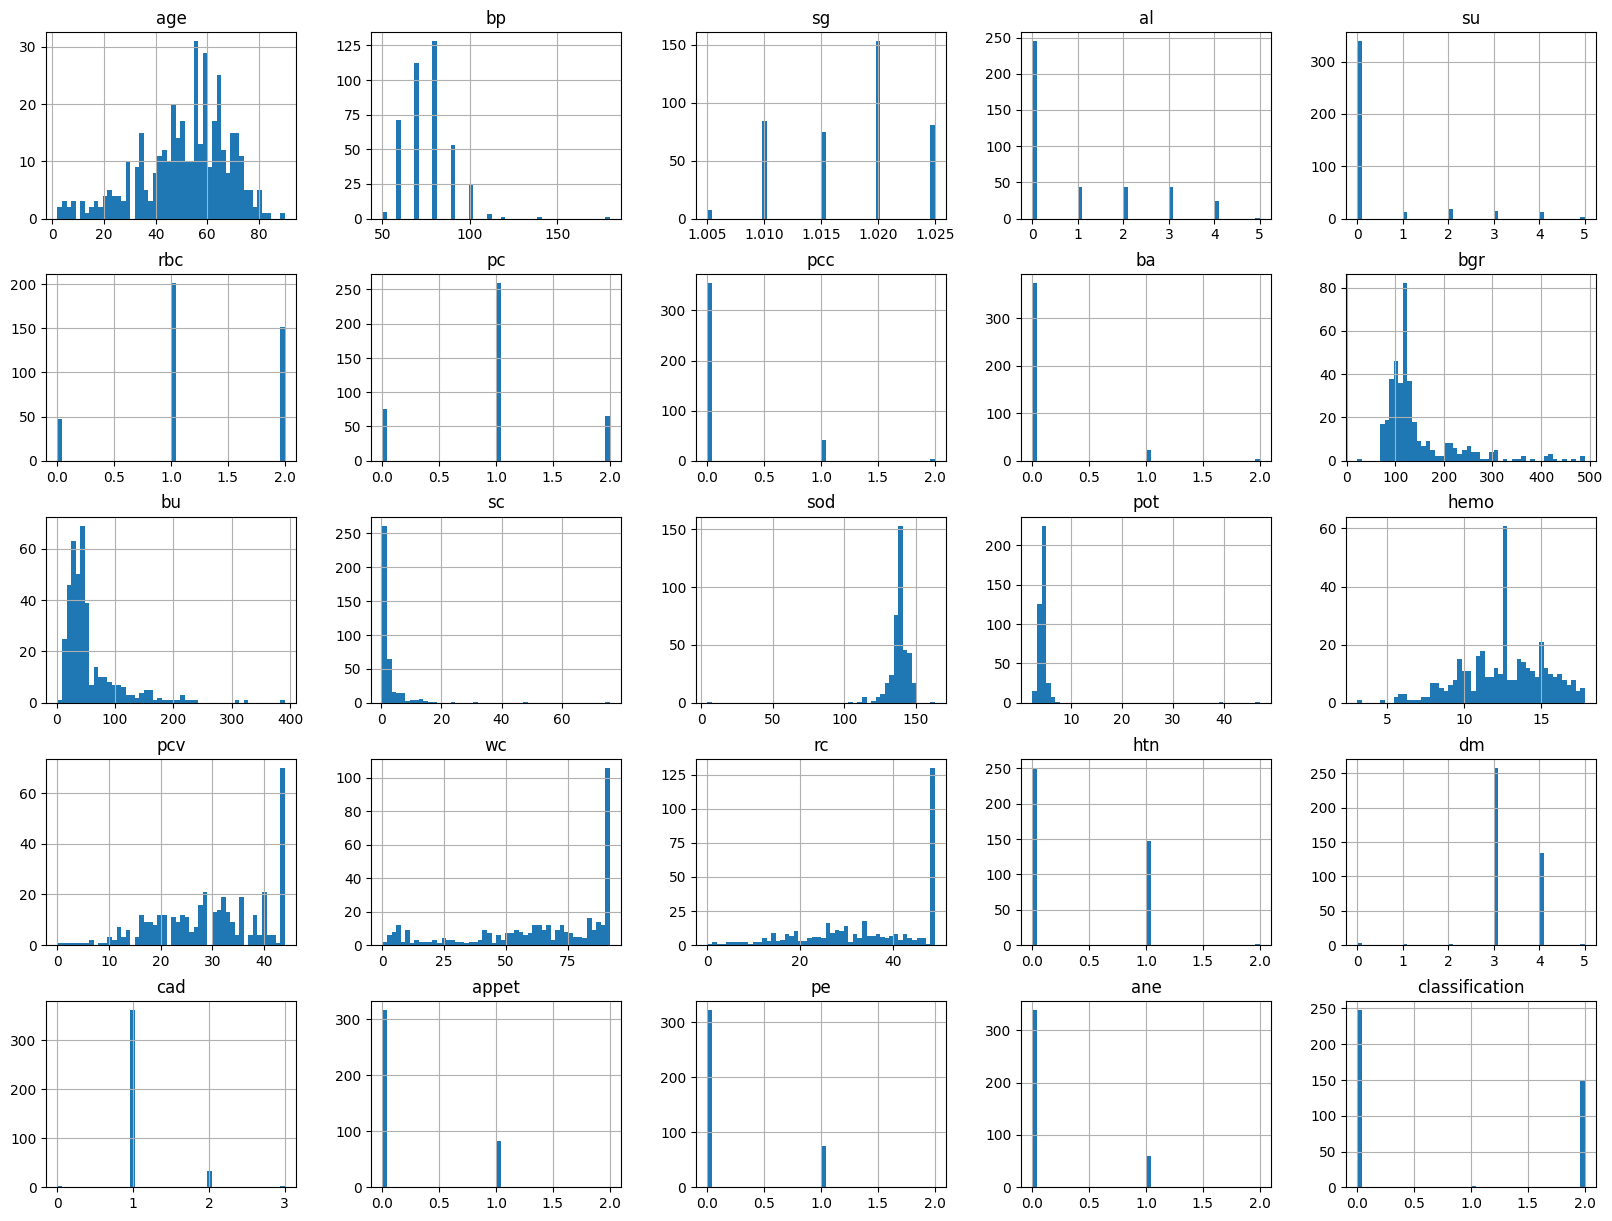

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

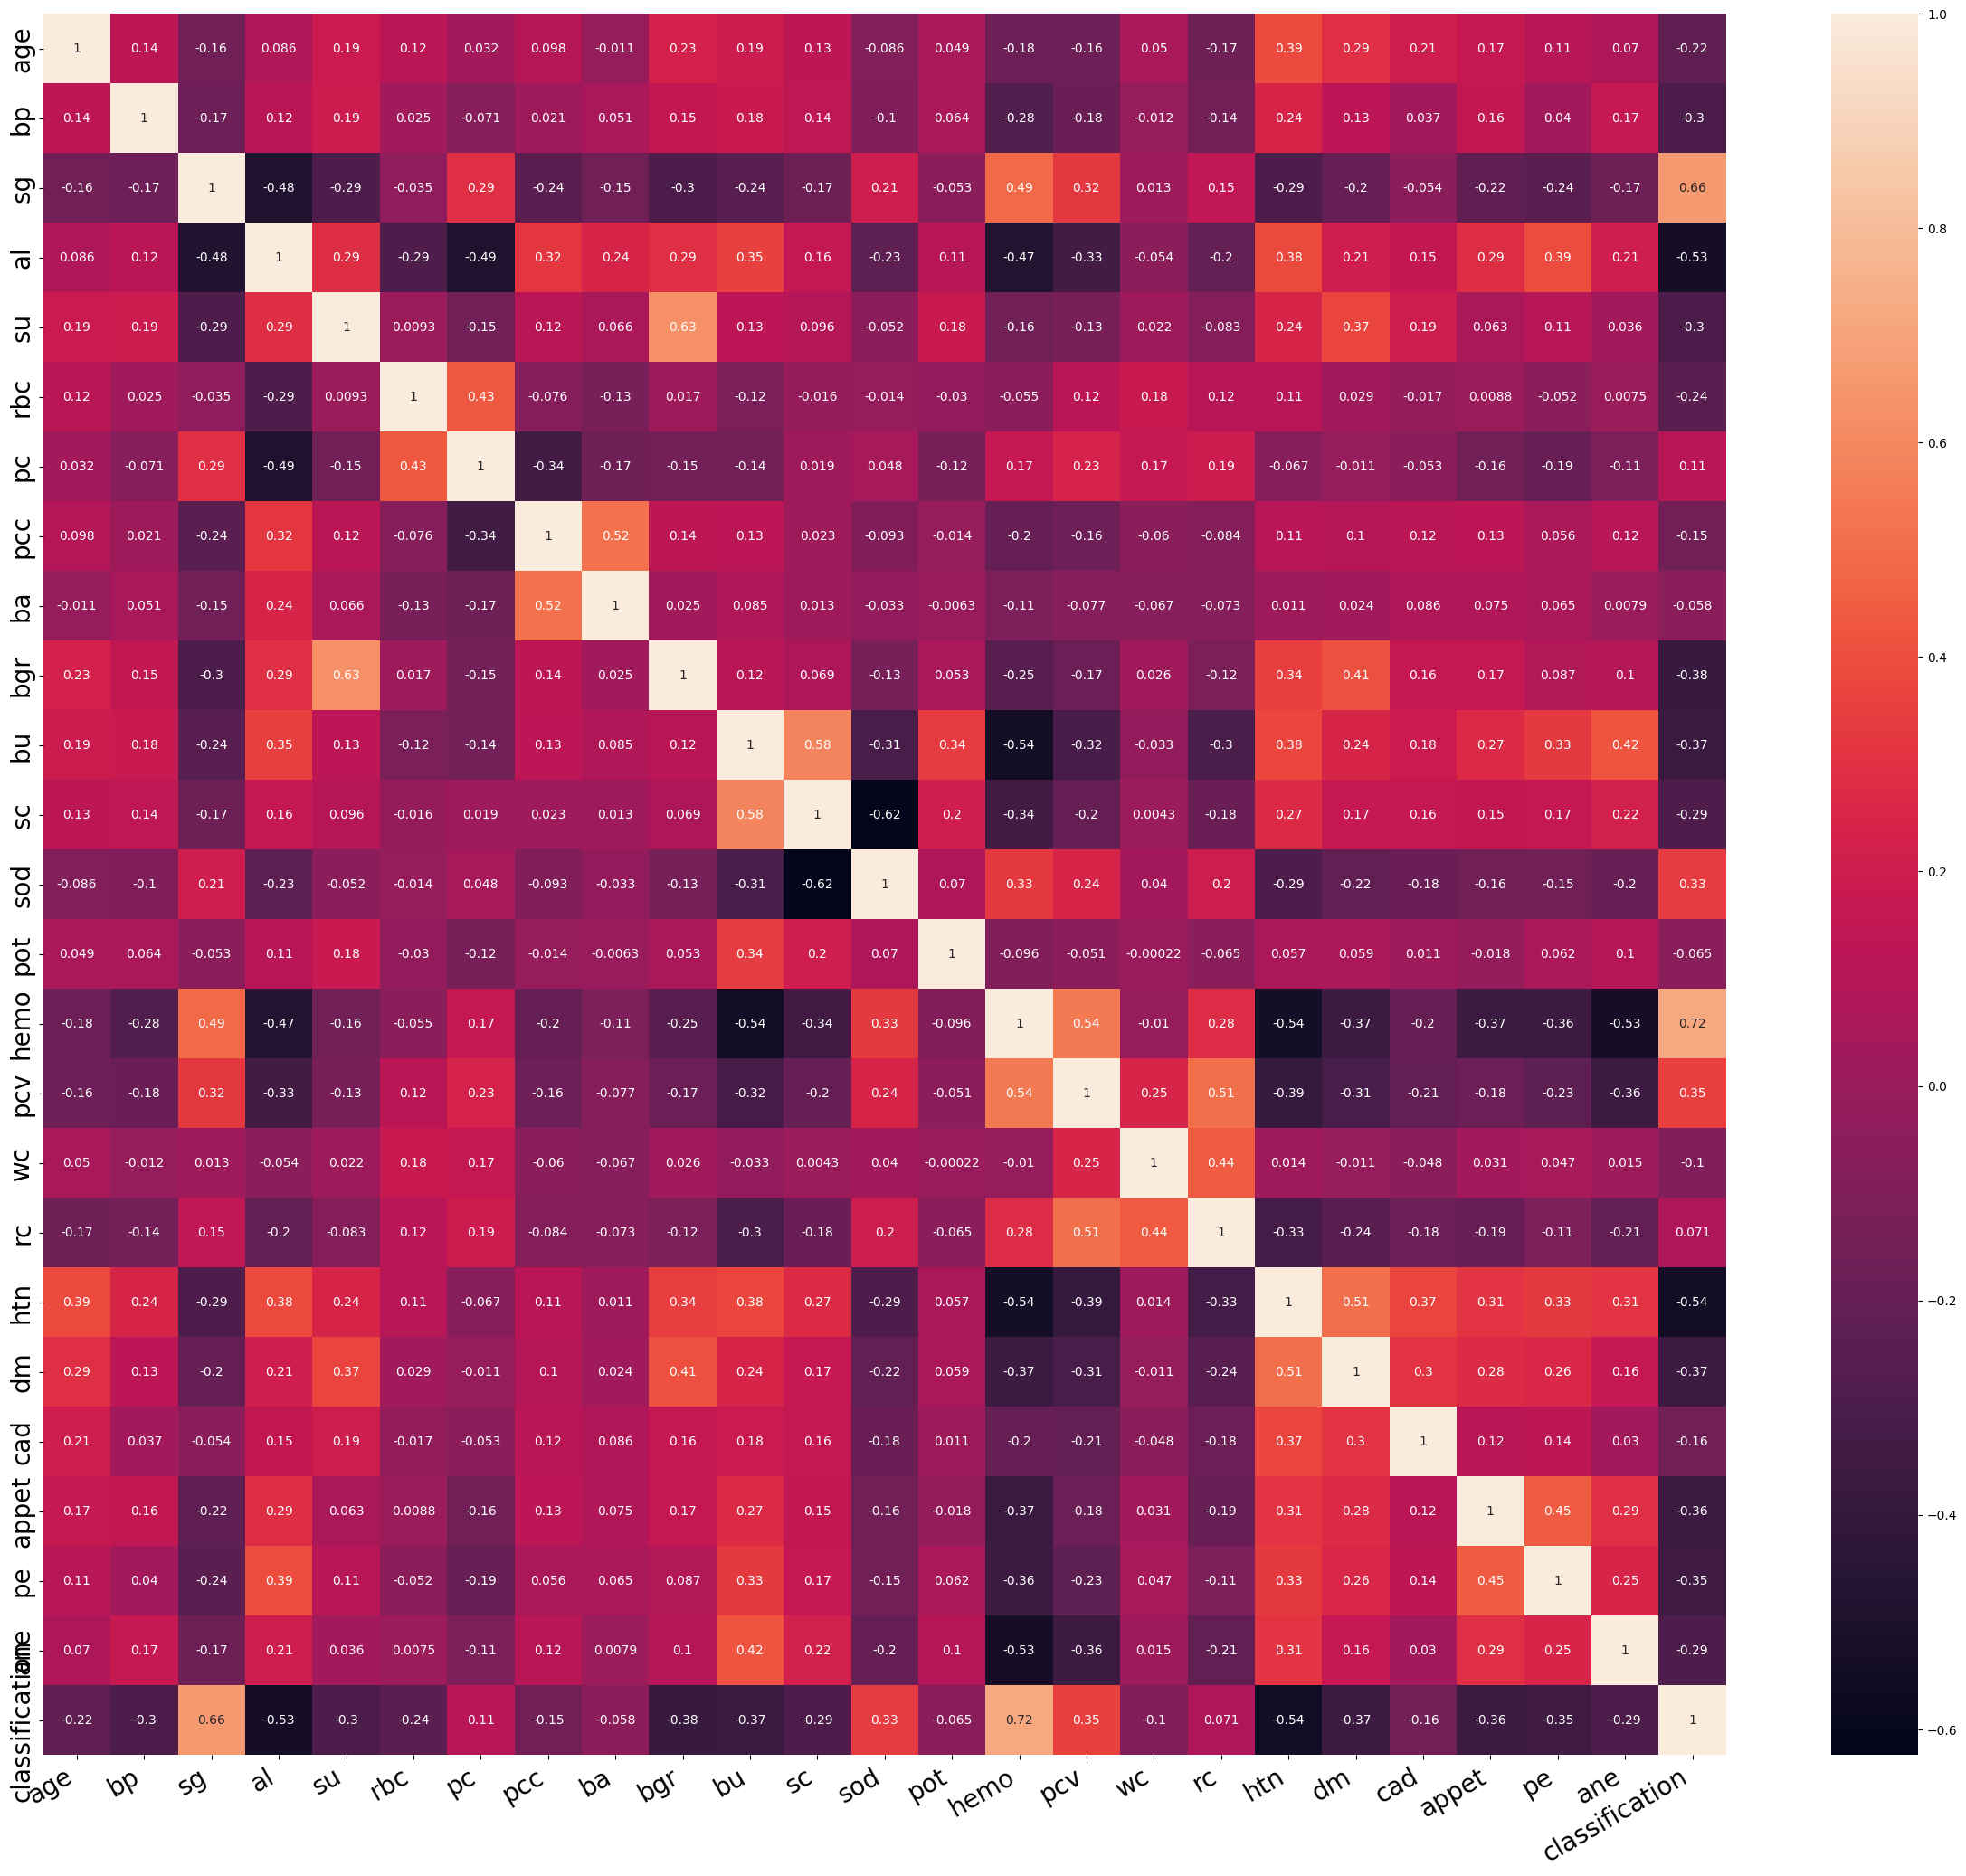

In [17]:
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))
corr_mtrx = data.corr()
correlation_axis = sns.heatmap(corr_mtrx, annot= True)

plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [18]:
corr_matrix = data.corr()
corr_matrix['classification'].sort_values(ascending=False)

classification    1.000000
hemo              0.724742
sg                0.657810
pcv               0.349749
sod               0.334153
pc                0.114674
rc                0.071121
ba               -0.057511
pot              -0.065448
wc               -0.102709
pcc              -0.149153
cad              -0.155347
age              -0.222985
rbc              -0.238042
sc               -0.292050
ane              -0.293151
bp               -0.296613
su               -0.296919
pe               -0.352622
appet            -0.359114
dm               -0.366016
bu               -0.371536
bgr              -0.378495
al               -0.531885
htn              -0.543271
Name: classification, dtype: float64

array([[<Axes: xlabel='classification', ylabel='classification'>,
        <Axes: xlabel='hemo', ylabel='classification'>,
        <Axes: xlabel='sg', ylabel='classification'>,
        <Axes: xlabel='pcv', ylabel='classification'>,
        <Axes: xlabel='sod', ylabel='classification'>,
        <Axes: xlabel='pc', ylabel='classification'>,
        <Axes: xlabel='rc', ylabel='classification'>],
       [<Axes: xlabel='classification', ylabel='hemo'>,
        <Axes: xlabel='hemo', ylabel='hemo'>,
        <Axes: xlabel='sg', ylabel='hemo'>,
        <Axes: xlabel='pcv', ylabel='hemo'>,
        <Axes: xlabel='sod', ylabel='hemo'>,
        <Axes: xlabel='pc', ylabel='hemo'>,
        <Axes: xlabel='rc', ylabel='hemo'>],
       [<Axes: xlabel='classification', ylabel='sg'>,
        <Axes: xlabel='hemo', ylabel='sg'>,
        <Axes: xlabel='sg', ylabel='sg'>,
        <Axes: xlabel='pcv', ylabel='sg'>,
        <Axes: xlabel='sod', ylabel='sg'>,
        <Axes: xlabel='pc', ylabel='sg'>,
        <Axe

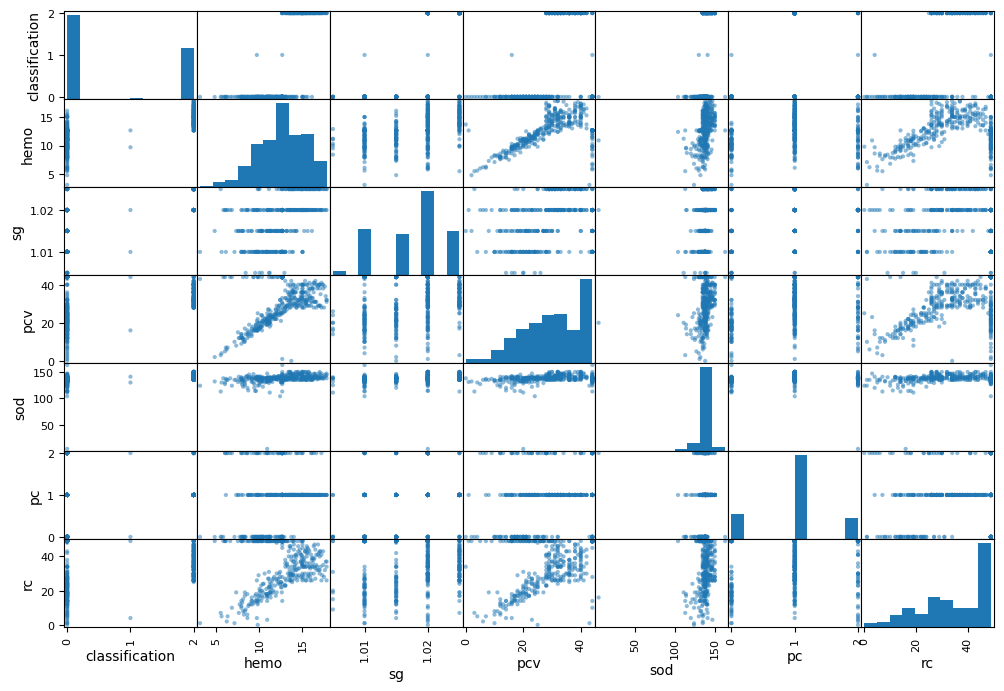

In [19]:
attributes = ['classification','hemo','sg','pcv','sod','pc','rc']
scatter_matrix(data[attributes],figsize=(12,8))

In [20]:
#Spliting entire data into Train and Test Segments
from numpy.random import RandomState
rng = RandomState()

train = data.sample(frac=0.7, random_state=rng)
test = data.loc[~data.index.isin(train.index)]
train.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
348,38.0,80.0,1.020,0.0,0.0,1,1,0,0,99.0,...,32,68,46,0,3,1,0,0,0,2
319,30.0,60.0,1.020,0.0,0.0,1,1,0,0,138.0,...,44,92,49,0,3,1,0,0,0,2
105,65.0,80.0,1.015,0.0,0.0,2,1,0,0,115.0,...,30,63,34,0,3,1,0,0,0,0
394,50.0,80.0,1.020,0.0,0.0,1,1,0,0,137.0,...,33,87,27,0,3,1,0,0,0,2
51,54.0,100.0,1.015,3.0,0.0,2,1,1,0,162.0,...,21,92,49,1,4,1,1,1,0,0


In [21]:
test.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,49,0,4,1,1,0,1,0
7,24.0,80.0,1.015,2.0,4.0,1,0,0,0,410.0,...,32,64,31,0,4,1,0,1,0,0
10,50.0,60.0,1.010,2.0,4.0,2,0,1,0,490.0,...,16,92,49,1,4,1,0,0,1,0
12,68.0,70.0,1.015,3.0,1.0,2,1,1,0,208.0,...,16,19,14,1,4,2,1,1,0,0
15,40.0,80.0,1.015,3.0,0.0,2,1,0,0,76.0,...,12,39,7,1,3,1,0,0,1,0


In [22]:
data = train[attributes]
data.head(5)

,classification,hemo,sg,pcv,sod,pc,rc
348,2,13.60,1.020,32,147.0,1,46
319,2,12.65,1.020,44,135.0,1,49
105,0,14.10,1.015,30,139.0,1,34
394,2,14.10,1.020,33,139.0,1,27
51,0,10.30,1.015,21,136.0,1,49


In [23]:
label = data['classification']
data = data.drop('classification',axis=1)
data.head(5)

,hemo,sg,pcv,sod,pc,rc
348,13.60,1.020,32,147.0,1,46
319,12.65,1.020,44,135.0,1,49
105,14.10,1.015,30,139.0,1,34
394,14.10,1.020,33,139.0,1,27
51,10.30,1.015,21,136.0,1,49


In [24]:
test.to_csv('test.csv')

In [25]:
#Test and Train Split of Training Data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data,label,test_size=0.2, random_state=42)
def display_results(y_val,prediction):
    # Print the Confusion Matrix and slice it into four pieces
    cm = confusion_matrix(y_val,prediction)
    # visualize confusion matrix with seaborn heatmap
    cm_matrix = pd.DataFrame(data=cm)
    print("Model Accuracy:",accuracy_score(y_val,prediction))
    #sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
prediction = clf.predict(X_val)
print(classification_report(y_val,prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       0.00      0.00      0.00         1
           2       1.00      0.89      0.94        18

    accuracy                           0.95        56
   macro avg       0.64      0.63      0.63        56
weighted avg       0.93      0.95      0.94        56



In [27]:
display_results(y_val,prediction)

Model Accuracy: 0.9464285714285714


In [28]:
#tesing on test split
test_label = test['classification']
test_data = test[attributes].drop('classification',axis=1)
test_data.head(5)

,hemo,sg,pcv,sod,pc,rc
2,9.6,1.010,19,138.0,1,49
7,12.4,1.015,32,138.0,0,31
10,9.4,1.010,16,138.0,0,49
12,9.7,1.015,16,138.0,1,14
15,7.6,1.015,12,141.0,1,7


In [29]:
predict = clf.predict(test_data)
display_results(test_label,predict)

Model Accuracy: 0.8916666666666667


In [30]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [31]:
prediction = clf_gini.predict(X_val)
print(classification_report(y_val,prediction))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.00      0.00      0.00         1
           2       0.89      0.94      0.92        18

    accuracy                           0.93        56
   macro avg       0.61      0.63      0.62        56
weighted avg       0.91      0.93      0.92        56



[Text(0.5416666666666666, 0.875, 'x[0] <= 13.15\ngini = 0.471\nsamples = 224\nvalue = [139, 85]'),
 Text(0.3333333333333333, 0.625, 'x[3] <= 143.5\ngini = 0.072\nsamples = 133\nvalue = [128, 5]'),
 Text(0.16666666666666666, 0.375, 'x[0] <= 12.9\ngini = 0.046\nsamples = 127\nvalue = [124, 3]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.031\nsamples = 125\nvalue = [123, 2]'),
 Text(0.25, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.375, 'x[2] <= 36.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.75, 0.625, 'x[1] <= 1.017\ngini = 0.213\nsamples = 91\nvalue = [11, 80]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.8333333333333334, 0.375, 'x[5] <= 48.0\ngini = 0.07\nsamples = 83\nvalue = [3, 80]'),
 Text(0.75, 0.125, 'gini = 0.049\nsamples = 80\nvalue = [2, 78]'),
 Te

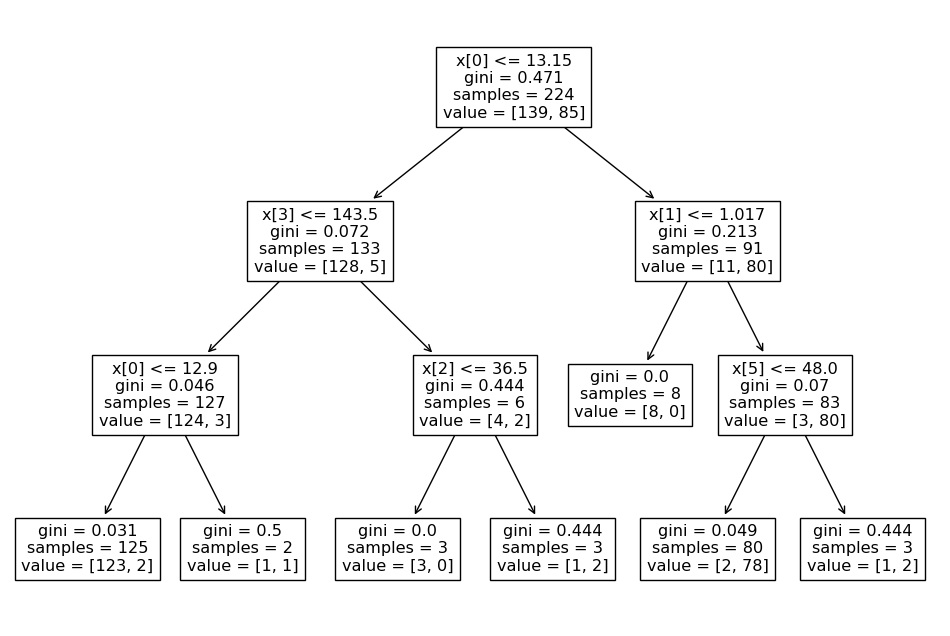

In [32]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [33]:
display_results(y_val,prediction)

Model Accuracy: 0.9285714285714286


In [34]:
predict = clf_gini.predict(test_data)
display_results(test_label,predict)

Model Accuracy: 0.9583333333333334


In [35]:
#from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
#SVM
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV
# SVM classifier
svm = SVC(tol=1e-5)

# parameters
parameters = {
                'kernel': ['linea', 'poly', 'rbf', 'sigmoid'],
                'C': [0.01,0.03,0.1,0.3,1,3,10,30,100,300],
                'max_iter': [100,1000,5000,-1],
                'class_weight': [None, 'balanced'],
            }

# grid search for parameters
grid = GridSearchCV(estimator=svm, param_grid=parameters, n_jobs=-1)
grid.fit(X_train, y_train)
# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid.best_params_, grid.best_score_))

# prediction results
y_pred = grid.predict(X_val)
display_results(y_val,y_pred)

The best parameters are {'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf', 'max_iter': 1000} with a score of 0.9378

Model Accuracy: 0.9642857142857143


In [37]:
predict = grid.predict(test_data)
display_results(test_label,predict)

Model Accuracy: 0.9083333333333333


In [38]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

# print accuracy metrics
cm = confusion_matrix(y_val,y_pred)
print(accuracy_score(y_val,y_pred))
cm_matrix = pd.DataFrame(data=cm)

#sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

0.8214285714285714


In [39]:
predict = knn.predict(test_data)
display_results(test_label,predict)

Model Accuracy: 0.925


In [40]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_val)
# print accuracy metrics
cm = confusion_matrix(y_val,prediction)
print(accuracy_score(y_val,prediction))

0.9464285714285714


In [41]:
predict = rclf.predict(test_data)
display_results(test_label,predict)

Model Accuracy: 0.9916666666666667


In [42]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm='SAMME.R',
    learning_rate = 0.5
)
ada_clf.fit(X_train, y_train)
prediction = ada_clf.predict(X_val)
# print accuracy metrics
cm = confusion_matrix(y_val,prediction)
print(accuracy_score(y_val,prediction))

0.9464285714285714


In [43]:
predict = ada_clf.predict(test_data)
display_results(test_label,predict)

Model Accuracy: 0.975


In [47]:
!pip install plotly


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import sys

# Specify the new directory path where Plotly is located
new_plotly_directory = r"c:\users\hp\anaconda3\lib\site-packages"

# Add the new directory to the Python path
sys.path.append(new_plotly_directory)

# Import the Plotly module
import plotly


In [49]:
models = pd.DataFrame({
    'Model' : [ 'Logistic Regression', 'Decision Tree','SVM','KNN' ,'Random Forest','AdaBoost'],
    'Score' : [89.16, 97.5,93.33,93.33,98.33,85]
})

models

,Model,Score
0,Logistic Regression,89.16
1,Decision Tree,97.50
2,SVM,93.33
3,KNN,93.33
4,Random Forest,98.33
5,AdaBoost,85.00


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')

In [ ]:
import pickle
pickle.dump(rclf, open('../models/kidney.pkl', 'wb'))